In [1]:
import tensorflow as tf
import numpy as np

In [2]:
corpus = "He is the king . The king is royal . She is the royal queen"

In [3]:
raw_sentence = corpus.split(".")
# 단어 토큰화
sentences = []
for sentence in raw_sentence:
  sentences.append(sentence.split())

sentences

[['He', 'is', 'the', 'king'],
 ['The', 'king', 'is', 'royal'],
 ['She', 'is', 'the', 'royal', 'queen']]

skip-gram

In [4]:
#dataset 만들기
#He is the (He is) (He the) // He is the king (is He) (is the) (is king)
data = []
window_size = 2

#window 만들기
for sentence in sentences:
  for word_index, word in enumerate(sentence):
    #시작 위치
    start_index = max(word_index - window_size, 0) #뺀 값이 음수 나오면 0으로 세팅
    #끝 위치; +1은 슬라이싱 때문에 해주는 것
    end_index = min(word_index + window_size + 1, len(sentence)) #더한 값은 최대 len(sentence)까지

    for nb_word in sentence[start_index:word_index]:
      data.append([word, nb_word])

    for nb_word in sentence[word_index + 1:end_index]: #주변단어는 나 자신을 포함하지 않으므로 +1
      data.append([word, nb_word])

data


[['He', 'is'],
 ['He', 'the'],
 ['is', 'He'],
 ['is', 'the'],
 ['is', 'king'],
 ['the', 'He'],
 ['the', 'is'],
 ['the', 'king'],
 ['king', 'is'],
 ['king', 'the'],
 ['The', 'king'],
 ['The', 'is'],
 ['king', 'The'],
 ['king', 'is'],
 ['king', 'royal'],
 ['is', 'The'],
 ['is', 'king'],
 ['is', 'royal'],
 ['royal', 'king'],
 ['royal', 'is'],
 ['She', 'is'],
 ['She', 'the'],
 ['is', 'She'],
 ['is', 'the'],
 ['is', 'royal'],
 ['the', 'She'],
 ['the', 'is'],
 ['the', 'royal'],
 ['the', 'queen'],
 ['royal', 'is'],
 ['royal', 'the'],
 ['royal', 'queen'],
 ['queen', 'the'],
 ['queen', 'royal']]

In [5]:
words = []
for sentence in sentences:
  for word in sentence:
    words.append(word)

#list를 set으로 만들어 unique한 단어들만 나오도록
words = set(words)
words

{'He', 'She', 'The', 'is', 'king', 'queen', 'royal', 'the'}

In [6]:
#단어사전 만들기
word2id = {}
id2word = {}

vocab_size = len(words)

for i, word in enumerate(words):
  word2id[word] = i
  id2word[i] = word

print(word2id)
print(id2word)

{'queen': 0, 'the': 1, 'is': 2, 'She': 3, 'king': 4, 'He': 5, 'The': 6, 'royal': 7}
{0: 'queen', 1: 'the', 2: 'is', 3: 'She', 4: 'king', 5: 'He', 6: 'The', 7: 'royal'}


In [7]:
#단어 원핫 인코딩
def to_one_hot(word_index, vocab_size):
  temp = np.zeros(vocab_size)
  temp[word_index] = 1
  return temp

In [8]:
x_train = []
y_train = []

for word in data:
  x_train.append(to_one_hot(word2id[word[0]], vocab_size))
  y_train.append(to_one_hot(word2id[word[1]], vocab_size))

In [9]:
x_train

[array([0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.

In [10]:
#list를 numpy array로 변환
x_train = np.asarray(x_train, dtype = np.float32)
y_train = np.asarray(y_train, dtype = np.float32)

In [11]:
x_train.shape

(34, 8)

In [12]:
class Word2Vec:
  #typical input형태
  def __init__(self, vocab_size=10, embedding_dim=5, optimizer='sgd', epochs=100, learning_rate=0.01):
    self.vocab_size = vocab_size
    self.embedding_dim = embedding_dim
    self.epochs = epochs

    #optimizer 세팅
    if optimizer == 'adam':
      self.optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    else:
      self.optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

    self.W1 = tf.Variable(tf.random.normal([self.vocab_size, self.embedding_dim]))
    self.b1 = tf.Variable(tf.random.normal([self.embedding_dim]))

    self.W2 = tf.Variable(tf.random.normal([self.embedding_dim, self.vocab_size]))
    self.b2 = tf.Variable(tf.random.normal([self.vocab_size]))

  def vectorized(self, word_index):
    return (self.W1 + self.b1)[word_index]

  def train(self, x_train, y_train):
    for i in range(self.epochs):
      with tf.GradientTape() as tape:
        # XW + b
        hidden_layer = tf.add(tf.matmul(x_train, self.W1), self.b1)
        output_layer = tf.add(tf.matmul(hidden_layer, self.W2), self.b2)

        #output은 logit
        pred = tf.nn.softmax(output_layer)
        #cross entropy 계산
        loss = tf.reduce_mean(-tf.math.reduce_sum(y_train * tf.math.log(pred), axis=[1]))

        #각 파라미터에 대한 gradient 계산
        grads = tape.gradient(loss, [self.W1, self.b1, self.W2, self.b2])
        #각 파라미터를 업데이트
        self.optimizer.apply_gradients(zip(grads, [self.W1, self.b1, self.W2, self.b2]))
    
      if i % 1000 == 0:
        print(loss)

In [13]:
w2v = Word2Vec(vocab_size=vocab_size, embedding_dim=5, optimizer='adam', epochs=10000, learning_rate=0.1)
w2v.train(x_train, y_train)

tf.Tensor(4.2300262, shape=(), dtype=float32)
tf.Tensor(1.374109, shape=(), dtype=float32)
tf.Tensor(1.3741786, shape=(), dtype=float32)
tf.Tensor(1.3744653, shape=(), dtype=float32)
tf.Tensor(1.3741003, shape=(), dtype=float32)
tf.Tensor(1.3743448, shape=(), dtype=float32)
tf.Tensor(1.3741108, shape=(), dtype=float32)
tf.Tensor(1.3782954, shape=(), dtype=float32)
tf.Tensor(1.374096, shape=(), dtype=float32)
tf.Tensor(1.3741155, shape=(), dtype=float32)


In [14]:
word2id

{'He': 5,
 'She': 3,
 'The': 6,
 'is': 2,
 'king': 4,
 'queen': 0,
 'royal': 7,
 'the': 1}

In [15]:
#tensor니가 numpy로 보고 싶으면 numpy()
w2v.vectorized(word2id['queen']).numpy()

array([-1.3305185 , -0.24088788, -0.34352714,  0.8708737 , -5.6580434 ],
      dtype=float32)

In [16]:
from sklearn.manifold import TSNE
from sklearn import preprocessing

vector = w2v.W1 + w2v.b1

model = TSNE(n_components=2, random_state=42)
vectors = model.fit_transform(vector)

normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors, 'l2')

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


queen [ 0.787192   -0.61670804]
the [-0.82485855  0.56533927]
is [0.94978195 0.31291252]
She [-0.24413551  0.9697411 ]
king [-0.15563494  0.98781466]
He [-0.2925513  -0.95624983]
The [-0.9756935  -0.21913934]
royal [0.45033774 0.89285827]


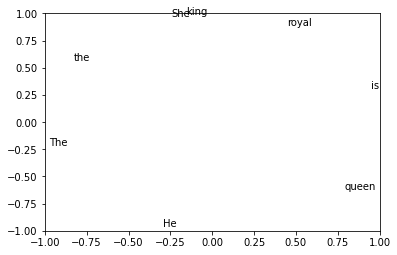

In [17]:
#학습 반복할수록 동시등장할수록 비슷한 위치의 벡터값 갖게 됨
#she와 queen 점점 가까워짐
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(left=-1, right=1)
ax.set_ylim(bottom=-1, top=1)

for word in words:
  print(word, vectors[word2id[word]])
  ax.annotate(word, (vectors[word2id[word]][0], vectors[word2id[word]][1]))

plt.show()

In [18]:
from gensim.models import Word2Vec

In [19]:
import gensim
gensim.__version__

'3.6.0'

In [20]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/취업정보/news.csv의 사본")

In [21]:
df['content'][:10]

0    2005년 10년만기 미국 국채수익률이  연방준비제도이사회(FRB)의 금리인상 지속...
1    2년만기 국채가격 4년래 최악의 한해 보내     10년만기 미국  국채수익률이  ...
2    2004년 마지막 거래일인 31일  뉴욕환시에서 미국 달러화는 개장초 102엔 근처...
3    ) 한해 마지막 날인 31일 뉴욕 주요 금융시장은 한산한 거래속에 새해를 준비하는 ...
4    지난해 뉴욕증시는 기술주 주도로 2년  연속연초 대비 상승하면서 대표지수들을 지난 ...
5    새해 첫날을 맞아 국채선물은 물량충격에 따른 영향으로 하락세로 출발했다.    3일...
6    재정경제부는 3일 오전에 실시된 국고채  3년물 입찰에서 2조4천900억원 전액이 ...
7    2005년 첫거래일인 3일 오전 채권시장은 시장예상치를 크게 웃돈 1월 국채발행 물...
8    코리보금리의 상승기조가 이어지고 있다.    3일 연합인포맥스는 3개월 코리보금리를...
9    국민선물이 1월중 달러-원 환율에 영향을  줄4대 핵심 이슈를 점검했다.    3일...
Name: content, dtype: object

In [22]:
sentences = df['content'].apply(lambda x : x.split(".    ")).tolist()
sentences[0]

['2005년 10년만기 미국 국채수익률이  연방준비제도이사회(FRB)의 금리인상 지속에 따른 인플레이션 압력 완화로 연 5%를 넘어서기 어려울 것으로 전망됐다',
 '31일 씨티그룹 애널리스트들은 2005년에 미국의 인플레가 잘 제어될 것이라면서반면 내년 2년만기 국채수익률은 FRB의 지속적인 금리인상으로 연 4.00-4.50%  수준까지 상승하게 될 것이라고 예측했다',
 '씨티그룹은 단기 국채수익률이 상승세를 나타낼 것으로 보이는 반면 장기  국채수익률의 상승폭은 제한될 것으로 보여 수익률 곡선 평탄화가 가속화될 것이라고 덧붙였다',
 '씨티그룹은 내년 고용창출 호조가 가구당 수입증가를 견인할 것이라면서 고용시장 호전이 소비자지출을 떠받치게 될 것이라고 말했다']

In [23]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 19.4 MB 268 kB/s 
     |████████████████████████████████| 448 kB 39.8 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually install

In [24]:
pip install konlpy

In [25]:
from konlpy.tag import Mecab
m = Mecab()

In [26]:
m.morphs('31일 씨티그룹 애널리스트들은 2005년에 미국의 인플레가 잘 제어될 것이라면서반면 내년 2년만기 국채수익률은 FRB의 지속적인 금리인상으로 연 4.00-4.50%  수준까지 상승하게 될 것이라고 예측했다')

['31',
 '일',
 '씨티',
 '그룹',
 '애널리스트',
 '들',
 '은',
 '2005',
 '년',
 '에',
 '미국',
 '의',
 '인플레',
 '가',
 '잘',
 '제어',
 '될',
 '것',
 '이',
 '라면서',
 '반면',
 '내년',
 '2',
 '년',
 '만기',
 '국채',
 '수익',
 '률',
 '은',
 'FRB',
 '의',
 '지속',
 '적',
 '인',
 '금리',
 '인상',
 '으로',
 '연',
 '4',
 '.',
 '00',
 '-',
 '4',
 '.',
 '50',
 '%',
 '수준',
 '까지',
 '상승',
 '하',
 '게',
 '될',
 '것',
 '이',
 '라고',
 '예측',
 '했',
 '다']

In [27]:
# sentences 안에 para(paragraph 문장묶음) 들고오고 para에서 sent(한 문장) 들고 옴
corpus = [m.morphs(sent) for para in sentences[:10000] for sent in para]

In [28]:
model = Word2Vec(sentences=corpus, size=100, alpha=0.025, window=4, min_count=4, sample=0.001, sg=1, workers=-1, iter=100) #size: dimension

In [29]:
model.save("/content/drive/MyDrive/취업정보/word2vec.model")

In [30]:
model = Word2Vec.load("/content/drive/MyDrive/취업정보/word2vec.model")

In [31]:
#단어의 벡터값
word_embedding = model.wv['인플레']
word_embedding

array([ 3.2306418e-03,  2.4096309e-03,  3.4422260e-03, -2.9180998e-03,
        3.1491576e-03,  4.5938678e-03, -1.3919185e-03, -2.1301906e-03,
       -3.7727517e-03, -4.8806136e-03,  3.1952392e-03, -2.5340251e-03,
       -9.6819503e-04,  1.7488921e-03,  5.4033508e-04,  2.4518610e-03,
       -2.4524610e-03,  2.2639034e-03, -9.0084906e-04, -3.5580527e-03,
        1.5031688e-03, -3.2337382e-04,  3.4546989e-03,  7.9299987e-04,
       -1.4649116e-03, -2.5378689e-03, -2.8761304e-03,  5.8599096e-04,
       -4.3928348e-03,  2.8354216e-03,  1.3331033e-03,  1.8377753e-03,
       -6.6575754e-05,  2.6027265e-03,  3.2391397e-03,  2.0160945e-03,
        3.6488322e-03, -1.0462481e-03, -4.8119351e-03, -3.9534722e-03,
       -1.5144974e-03, -4.8097111e-03,  4.4870838e-03,  3.0108690e-03,
        2.6286235e-03,  1.7060346e-03,  7.2803302e-04, -9.5224718e-04,
        3.3012591e-03, -4.5594401e-03, -1.9679805e-03,  2.2599648e-03,
       -2.5617664e-03, -3.9494058e-04,  3.4301192e-03,  2.9610081e-03,
      

In [32]:
model.wv.vectors.shape

(13356, 100)

In [33]:
model.wv.most_similar("금리")

[('이루어짐', 0.42492085695266724),
 ('이렇', 0.37072449922561646),
 ('들어간다', 0.3678402602672577),
 ('2700', 0.35955923795700073),
 ('패러다임', 0.35535699129104614),
 ('문득', 0.3536318242549896),
 ('승장', 0.35267433524131775),
 ('해명', 0.34809616208076477),
 ('그래도', 0.3475590646266937),
 ('0085', 0.3287105858325958)]